C:\Users\stoer\AppData\Local\Temp\ipykernel_17908\2232120569.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Z-values')


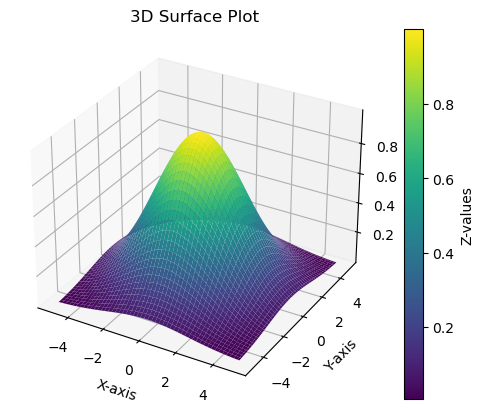

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Define the range of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create a meshgrid from x and y
X, Y = np.meshgrid(x, y)

# Define a function to compute Z values (e.g., a 2D Gaussian)
Z = np.exp(-(X**2 + Y**2) / 10)

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Create a ScalarMappable for the colorbar
sm = cm.ScalarMappable(cmap='viridis')
sm.set_array(Z)
cbar = plt.colorbar(sm, label='Z-values')

# Show the plot
plt.title('3D Surface Plot')
plt.show()

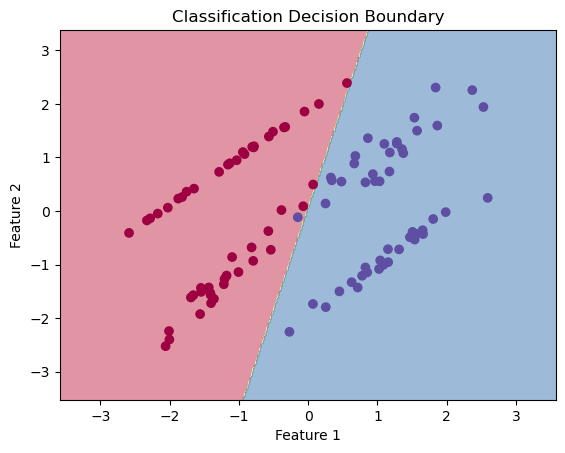

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Create a synthetic dataset for demonstration
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Create a logistic regression classifier (you can use any classifier you like)
classifier = LogisticRegression()

# Fit the classifier to the data
classifier.fit(X, y)

# Define the range of x and y values for the meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid of points within the specified range
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class labels for each point on the meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot to visualize the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Decision Boundary')
plt.show()

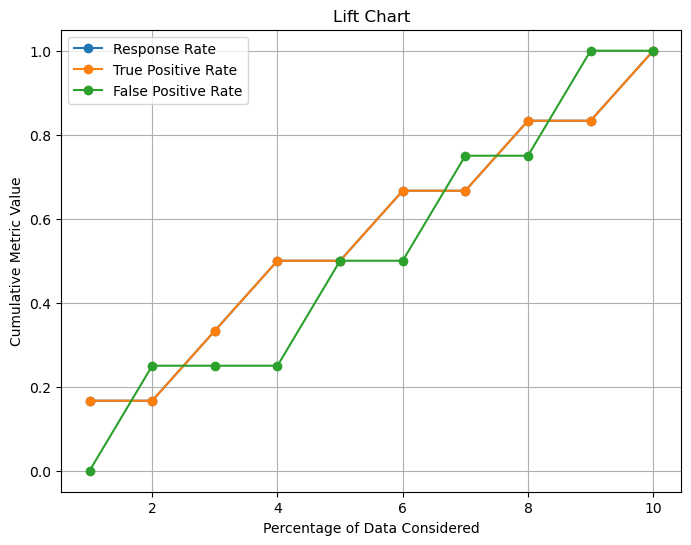

In [4]:
# Sample data for illustration (replace with your actual data)
predicted_probabilities = [0.8, 0.7, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25]
actual_labels = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]  # 1 represents a positive case

# Combine predicted probabilities and actual labels
data = list(zip(predicted_probabilities, actual_labels))
data.sort(reverse=True)  # Sort by predicted probabilities in descending order

# Calculate cumulative metrics
total_positives = sum(actual_labels)
total_samples = len(actual_labels)
cumulative_response_rate = []
cumulative_true_positive_rate = []
cumulative_false_positive_rate = []

for i in range(1, total_samples + 1):
    subset = data[:i]
    true_positives = sum(label for _, label in subset)
    false_positives = i - true_positives
    cumulative_response_rate.append(true_positives / total_positives)
    cumulative_true_positive_rate.append(true_positives / total_positives)
    cumulative_false_positive_rate.append(false_positives / (total_samples - total_positives))

# Plot the lift chart
plt.figure(figsize=(8, 6))
plt.plot(range(1, total_samples + 1), cumulative_response_rate, marker='o', label='Response Rate')
plt.plot(range(1, total_samples + 1), cumulative_true_positive_rate, marker='o', label='True Positive Rate')
plt.plot(range(1, total_samples + 1), cumulative_false_positive_rate, marker='o', label='False Positive Rate')
plt.xlabel('Percentage of Data Considered')
plt.ylabel('Cumulative Metric Value')
plt.title('Lift Chart')
plt.legend()
plt.grid()
plt.show()